1. Import Libraries
Start by importing the necessary libraries for df manipulation, visualization, and machine learning

In [70]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


2. Load Data
Load the dataset into a Pandas DataFrame.

In [71]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Create a sample dataset with both numerical and categorical df
n_samples = 1000

# Numerical features
age = np.random.randint(18, 70, size=n_samples)
income = np.random.randint(20000, 120000, size=n_samples)
expenses = np.random.randint(5000, 50000, size=n_samples)

# Categorical features
gender = np.random.choice(['Male', 'Female'], size=n_samples)
education = np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], size=n_samples)

# Target variable (binary classification: 0 or 1)
target = np.random.choice([0, 1], size=n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Expenses': expenses,
    'Gender': gender,
    'Education': education,
    'Target': target
})

# Introduce some missing values for testing purposes
df.loc[df.sample(frac=0.1).index, 'Income'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Expenses'] = np.nan
df.loc[df.sample(frac=0.05).index, 'Education'] = np.nan

# Save the DataFrame to a CSV
df.to_csv('sample_data_for_ml.csv', index=False)

# Display first few rows of the dataframe
df.head()


,Age,Income,Expenses,Gender,Education,Target
0,56,54674.0,5105.0,Male,Bachelors,0
1,69,55854.0,14078.0,Female,High School,0
2,46,66271.0,30003.0,Male,Bachelors,1
3,32,93688.0,NaN,Female,Masters,1
4,60,58518.0,NaN,Male,Masters,0


In [72]:
# # Load the dataset
# df = pd.read_csv("your_dataset.csv")

# # Display basic info about the df
# df.info()

# # Display first few rows
# df.head()


3. Data Cleaning
3.1 Handle Missing Data

Identify missing values and handle them using imputation (or dropping rows/columns if necessary

In [73]:
# Checking for missing values
df.isnull().sum()

# Impute missing values (example: mean for numeric, mode for categorical)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Create imputers for each type
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers to respective columns
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])


3.2 Handle Duplicates

Check and remove duplicate rows.

In [74]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


3.3 Handle Outliers

Outliers can be detected and handled using statistical methods like IQR or Z-score

In [75]:
# Using IQR to filter outliers for numeric columns
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
filtered_data = df[~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


4. Feature Engineering & Preprocessing
4.1 Categorical Encoding

If there are categorical variables, use encoding techniques like OneHotEncoding or LabelEncoding.

In [76]:
# One-Hot Encoding for categorical variables
# encoder = OneHotEncoder(drop='first', sparse=False)
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_categoricals = encoder.fit_transform(df[categorical_features])

# Combine with original DataFrame
encoded_df = pd.DataFrame(encoded_categoricals, columns=encoder.get_feature_names_out(categorical_features))
df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=categorical_features, inplace=True)


4.2 Normalization and Standardization

Normalize or standardize numeric features

In [77]:
# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# OR Standardization (Z-Score Scaling)
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


4.3 Feature Selection (Optional)

Perform feature selection if necessary (e.g., using correlation analysis or algorithms like RandomForest).

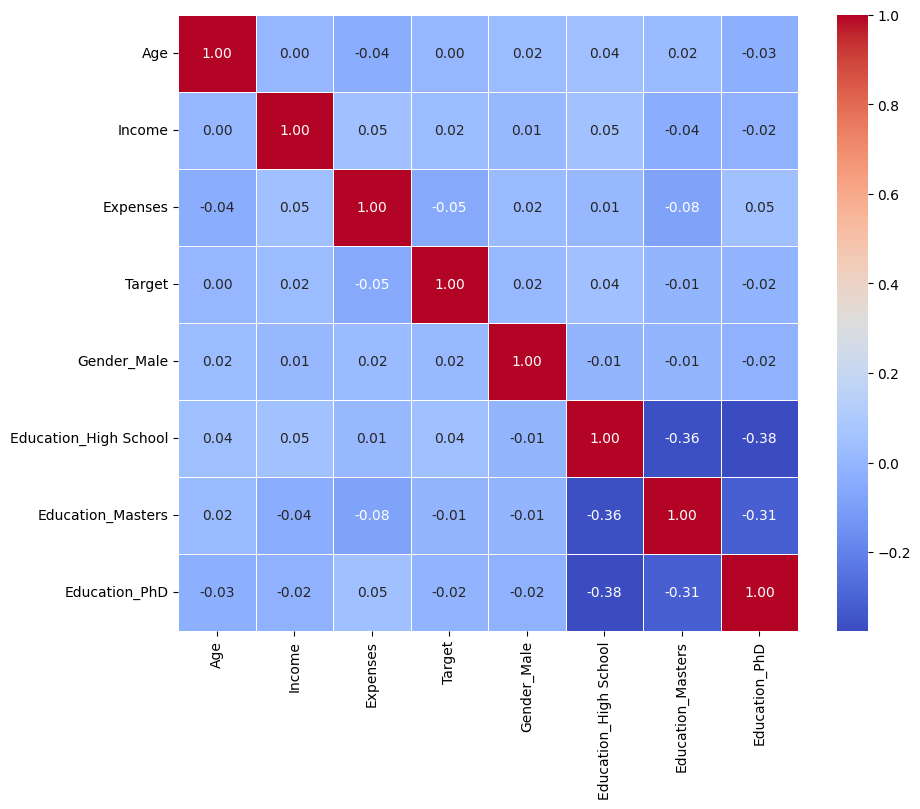

In [78]:
# Correlation heatmap to check for highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


5. Splitting Data into Training and Testing Sets

In [79]:
# Define X (features) and y (target)
X = df.drop(columns=['Target'])  # Assuming 'target' is the column you want to predict
y = df['Target']

# Split df into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6. Model Selection and Hyperparameter Tuning
6.1 Define a Model and Fit It

You can choose a model based on the problem at hand. I'll use RandomForestRegressor here, but you can try others like LogisticRegression, SVM, etc

In [ ]:
# Model selection: Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

6.2 Hyperparameter Tuning

Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters

In [68]:
# Grid Search for Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_

# Refit the model with the best parameters
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_e

7. Model Evaluation
7.1 Accuracy and Confusion Matrix

Evaluate the model on the test set.

In [85]:
# Predictions
y_pred = best_model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# Classification Report
# print(classification_report(y_test, y_pred))


Mean Squared Error (MSE): 1.09
Mean Absolute Error (MAE): 1.02
Root Mean Squared Error (RMSE): 1.04
R² Score: -0.09


7.2 ROC Curve and AUC (for binary classification)

For binary classification tasks, plot the ROC curve and calculate the AUC

In [86]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

8. Model Finalization and Deployment
Once you're happy with the model's performance, save the model for future use or deployment.

In [ ]:
import joblib

# Save the model to disk
joblib.dump(best_model, 'best_model.pkl')


NameError: name 'best_model' is not defined

Accuracy: 70.50%
Confusion Matrix:
[[279   4]
 [114   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       283
           1       0.43      0.03      0.05       117

    accuracy                           0.70       400
   macro avg       0.57      0.51      0.44       400
weighted avg       0.63      0.70      0.60       400



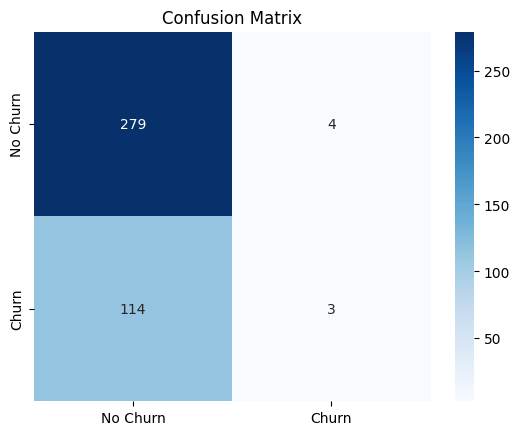

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 2000

# Create complex numerical features
age = np.random.randint(18, 70, size=n_samples)
income = np.random.normal(60000, 15000, size=n_samples).astype(int)
credit_score = np.random.normal(700, 50, size=n_samples).astype(int)
transaction_amount = np.random.normal(1000, 200, size=n_samples).astype(int)

# Create complex categorical features
gender = np.random.choice(['Male', 'Female'], size=n_samples)
education = np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], size=n_samples)
region = np.random.choice(['North', 'South', 'East', 'West'], size=n_samples)
employment_status = np.random.choice(['Employed', 'Unemployed', 'Self-Employed'], size=n_samples)

# Create a binary target variable (Customer Churn or Purchase)
churn = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # 30% churn rate

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Credit_Score': credit_score,
    'Transaction_Amount': transaction_amount,
    'Gender': gender,
    'Education': education,
    'Region': region,
    'Employment_Status': employment_status,
    'Churn': churn
})

# Introduce some missing values
df.loc[df.sample(frac=0.1).index, 'Income'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Transaction_Amount'] = np.nan
df.loc[df.sample(frac=0.05).index, 'Region'] = np.nan
df.loc[df.sample(frac=0.05).index, 'Education'] = np.nan

# Add some outliers to the 'Income' and 'Transaction_Amount' columns
df.loc[df.sample(frac=0.01).index, 'Income'] = df['Income'].max() + 10000
df.loc[df.sample(frac=0.01).index, 'Transaction_Amount'] = df['Transaction_Amount'].max() + 500

# Function to detect and handle outliers using IQR (Interquartile Range)
def handle_outliers(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)  # Cap the values to the outlier range
    return df

# Handle outliers for numerical columns
df = handle_outliers(df, numerical_columns=['Income', 'Transaction_Amount'])

# Handling missing values manually

# 1. For numerical columns, use SimpleImputer to replace missing values with the mean
numerical_columns = ['Income', 'Transaction_Amount', 'Credit_Score']
imputer_num = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])

# 2. For categorical columns, use SimpleImputer to replace missing values with the mode (most frequent)
categorical_columns = ['Region', 'Education']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

# One-hot encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.show()
